**Tesla Stock Price Prediction using ARIMA**

This dataset provides a comprehensive view of Tesla's stock performance over a significant period, from January 1, 2015, to January 17, 2024. Understanding market trends, performing time series analysis, and predicting future stock movements.

**Content:**

The dataset contains monthly stock price data for Tesla, Inc. It is structured into seven columns, detailing the date of the record and six key stock indicators:
1. Date : The date of the stock record.
2. Open :  The opening price of Tesla's stock for the month.
3. High : The highest price reached by Tesla's stock in the month.
4. Low : The lowest price of Tesla's stock in the month.
5. Close : The closing price of Tesla's stock for the month.
6. Volume : The total trading volume of Tesla's stock for the month.

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read dataset**

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Tesla stock price prediction/Tasla_Stock_Updated_V2.csv')

In [4]:
# Display first 5 rows
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [5]:
# display shape of dataset
data.shape

(2274, 7)

There are 2274 rows and 7 columns in the dataset.

In [6]:
# Basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB


There is no use of column 'Unnamed', so we have to drop it.

In [7]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
# Check missing values and duplicate values
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
data.duplicated().sum()

0

There is no any missing and duplicates values in the dataset.

**Outliers handling**

In [10]:
# find first quartile(Q1) and second quartile (Q2)
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers
outliers = data[( data['Close'] < lower_bound) | (data['Close'] > upper_bound)]

print("Outliers based on IQR")
print(outliers)

Outliers based on IQR
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


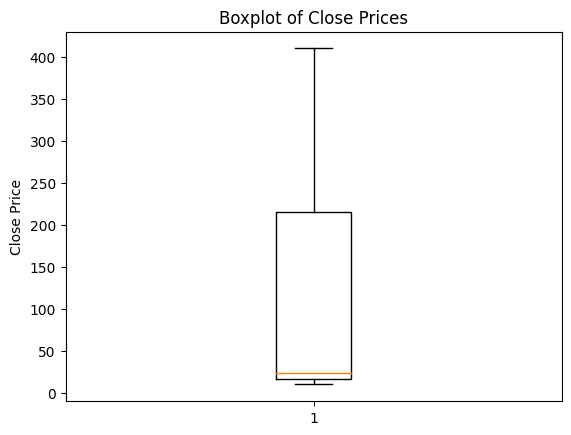

In [11]:
plt.boxplot(data['Close'])
plt.title('Boxplot of Close Prices')
plt.ylabel('Close Price')
plt.show()

From the above result and graph we can see that there is no outliers in the dataset.

**Data Visulization**

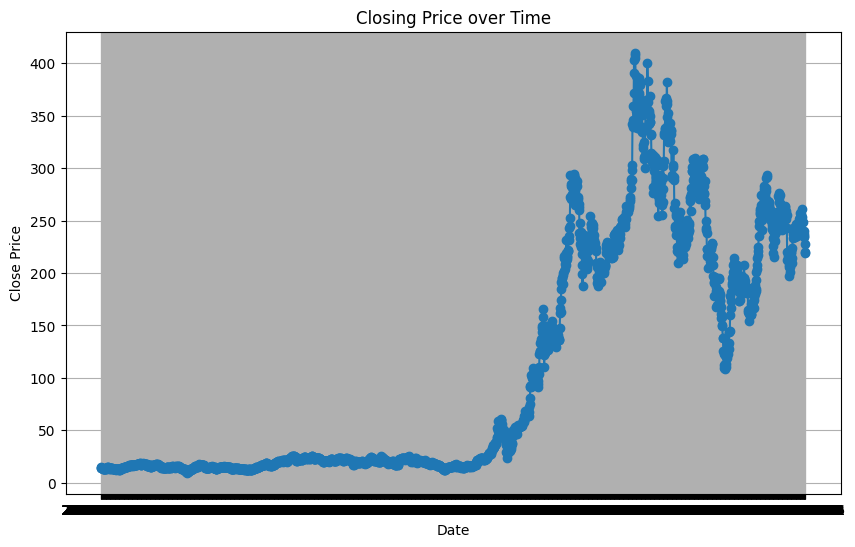

In [12]:
plt.figure(figsize = (10,6))
plt.plot(data['Date'], data['Close'], marker = 'o', linestyle = '-')
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

This graph shows that the closing price of Tesla stock over time, next we will calculate the mean and variance of the clsoing price.

In [13]:
closing_prices = data['Close']
mean_close_price = closing_prices.mean()
variance_close_price = closing_prices.var()

print('Mean of Closing Price: ',mean_close_price)
print("Variance of closing price: ", variance_close_price)

Mean of Closing Price:  103.46179386095301
Variance of closing price:  12328.109299505117


Augmented Dickey-Fuller (ADF) Test: Conduct the ADF test to statistically determine stationarity.

In [14]:
# Let’s check that if the given dataset is stationary or not, For that we use adfuller.
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(data['Close'])

Here we are considering that the null hypothesis that is data is not stationary and the alternate hypothesis that is data is stationary.

In [16]:
def adfuller_test(close_prices):
  result = adfuller(close_prices)
  labels = ['ADF test statistics', 'p-value', '#lags used', 'no. of observations']
  for value, label in zip(result, labels):
    print(label+ ': ' + str(value))



In [17]:
if result[1] <= 0.05:
  print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
  print("weak evidence against null hypothesis,indicating it is non-stationary \n\n")

adfuller_test(data['Close'])

weak evidence against null hypothesis,indicating it is non-stationary 


ADF test statistics: -1.2114232360565216
p-value: 0.6686625213787413
#lags used: 27
no. of observations: 2246


Here P-value is 0.66 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

In [18]:
# Let’s try to see the first difference and seasonal difference

data['Close_price_difference'] = data['Close'] - data['Close'].shift(1)
data['Seasonal_close_price_diff'] = data['Close'] - data['Close'].shift(12)
data.head()

,Date,Open,High,Low,Close,Volume,Close_price_difference,Seasonal_close_price_diff
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,-0.614668,NaN
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,0.079333,NaN
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,-0.022000,NaN
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,-0.021999,NaN


In [19]:
# again test that data is stationary
adfuller_test(data['Seasonal_close_price_diff'].dropna())

ADF test statistics: -8.070811521545792
p-value: 1.5514010693068186e-12
#lags used: 25
no. of observations: 2236


**Here P-value is 1.55,  which means we will be rejecting the null hypothesis. So data is stationary.**

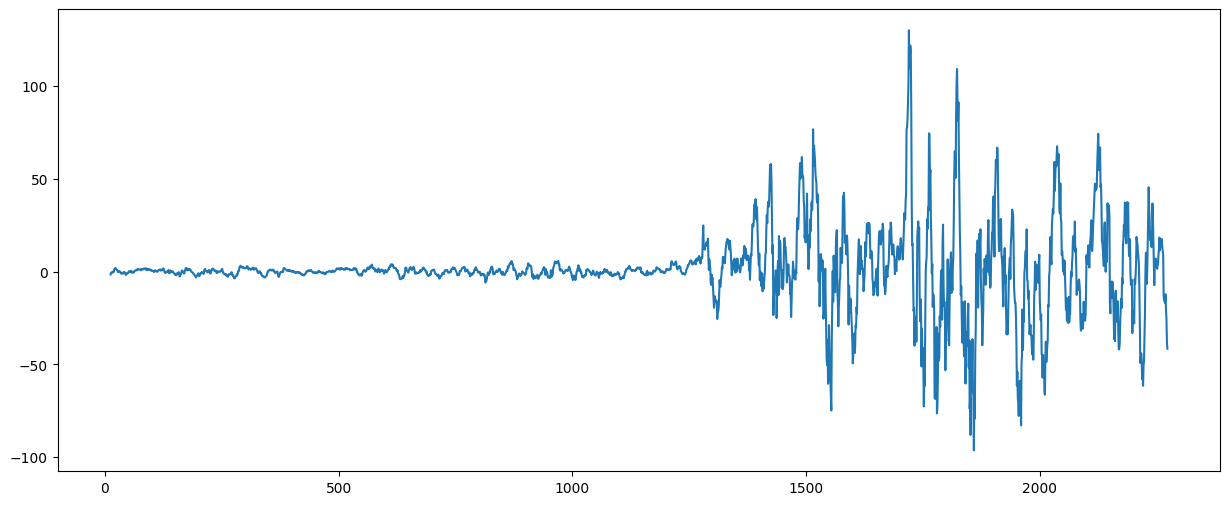

In [20]:
# draw plot
plt.figure(figsize = (15,6))
data['Seasonal_close_price_diff'].plot()
plt.show()

**Create auto correlation**

In [21]:
from pandas.plotting import autocorrelation_plot

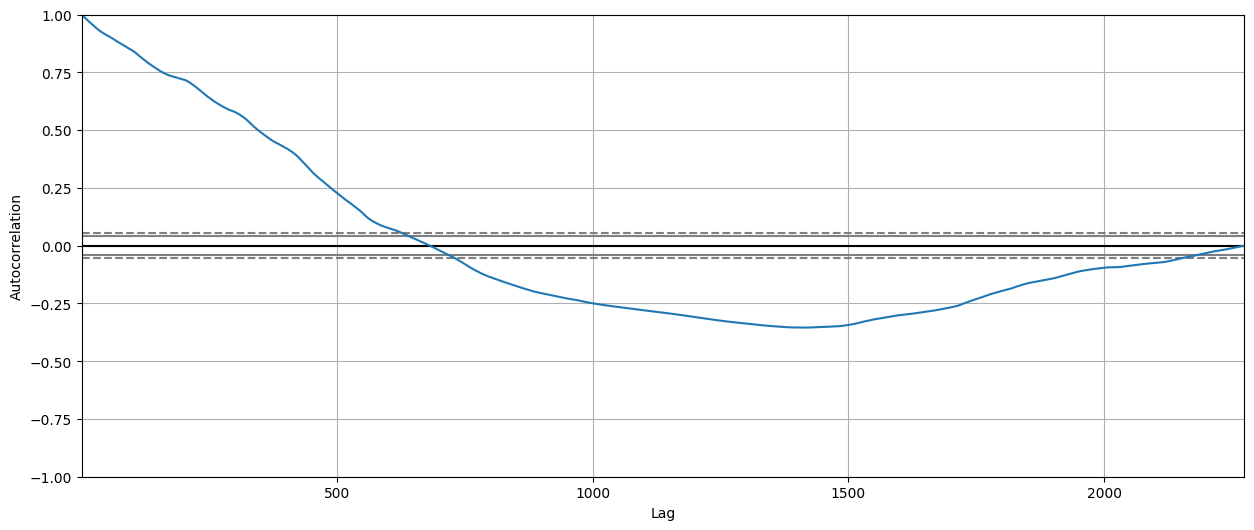

In [22]:
plt.figure(figsize = (15,6))
autocorrelation_plot(data['Close'])
plt.show()

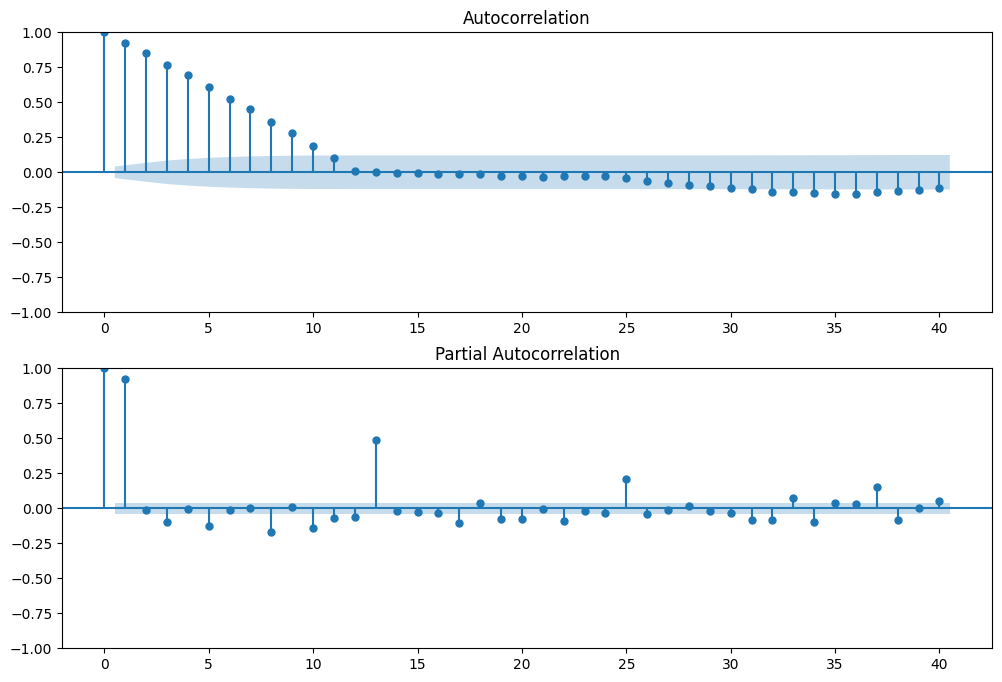

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal_close_price_diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal_close_price_diff'].dropna(),lags=40,ax=ax2)

In [24]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2274
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7182.819
Date:                Mon, 18 Mar 2024   AIC                          14371.639
Time:                        12:06:25   BIC                          14388.825
Sample:                             0   HQIC                         14377.909
                               - 2274                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5984      0.194     -3.091      0.002      -0.978      -0.219
ma.L1          0.5662      0.200      2.833      0.005       0.175       0.958
sigma2        32.5324      0.367     88.726      0.000      31.814      33.251
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             13511.26
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):             545.02   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
data['forecast'] = model_fit.predict(start = 90, end = 103, dynamic = True)

<Axes: >

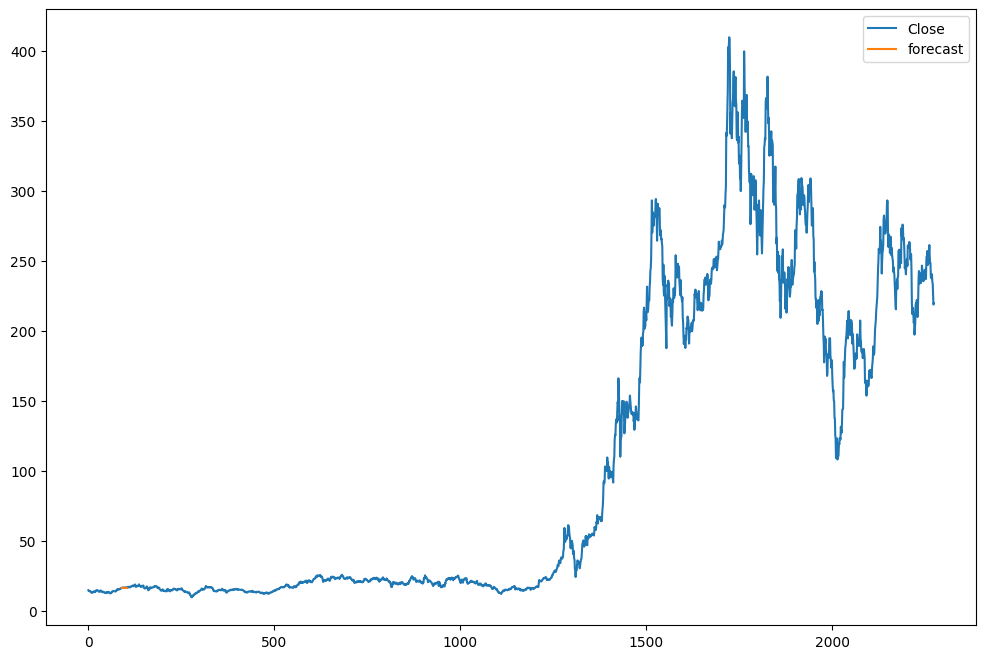

In [27]:
data[['Close', 'forecast']].plot(figsize = (12,8))

**Stock Price Prediction using FBProphet**

Prophet is an open source tool from facebook used for forecasting time series data which help businesses understand and possibly predict the market. It is based on a decomposable additive model where non-linear trends fit with seasonality.

Terms in prophet:

*Trend:* the trend shows the tendency of the data to increase or decrese over long period of time and it filter out the seasonal variations.

*Seasonality:* Seasonality is the variations that occur a short period of time and is not prominent enough to be called seasonality.

**Analyzing the time series data using fb prophet:**

Build a model to forecast the stock price prediction

In [28]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [29]:
data.head()

,Date,Open,High,Low,Close,Volume,Close_price_difference,Seasonal_close_price_diff,forecast
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN,NaN
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,-0.614668,NaN,NaN
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,0.079333,NaN,NaN
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,-0.022000,NaN,NaN
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,-0.021999,NaN,NaN


In [30]:
# Here we only used 'Date' and 'Close' price columns

df = data[['Date', 'Close']]

In [37]:
# display first 5 rows
df.head()

,Date,Close
0,2015-01-02,14.620667
1,2015-01-05,14.006000
2,2015-01-06,14.085333
3,2015-01-07,14.063333
4,2015-01-08,14.041333


In [32]:
# display last 5 rows
df.tail()

,Date,Close
2269,2024-01-09,234.960007
2270,2024-01-10,233.940002
2271,2024-01-11,227.220001
2272,2024-01-12,218.889999
2273,2024-01-16,219.910004


The dataset contains data from Jan 2015 to Jan 2024.

Prophet expects the input dataframe to have 2 columns dates (ds), value (y) , then rename columns accordingly.

In [38]:
df = df.rename(columns = {'Date': 'ds', 'Close': 'y'})

In [39]:
# convert ds to datetime type
df['ds'] = pd.to_datetime(df['ds'])

In [40]:
# Initialize and fit model
model = Prophet()

model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7z2f24k/o5ib74h7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7z2f24k/8g4xz2g2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39664', 'data', 'file=/tmp/tmp_7z2f24k/o5ib74h7.json', 'init=/tmp/tmp_7z2f24k/8g4xz2g2.json', 'output', 'file=/tmp/tmp_7z2f24k/prophet_model9w4s1j81/prophet_model-20240318124514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
# Create dataframe for future predictions
future = model.make_future_dataframe(periods = 30) # adjust the number of periods

In [42]:
# make predictions
forecast = model.predict(future)

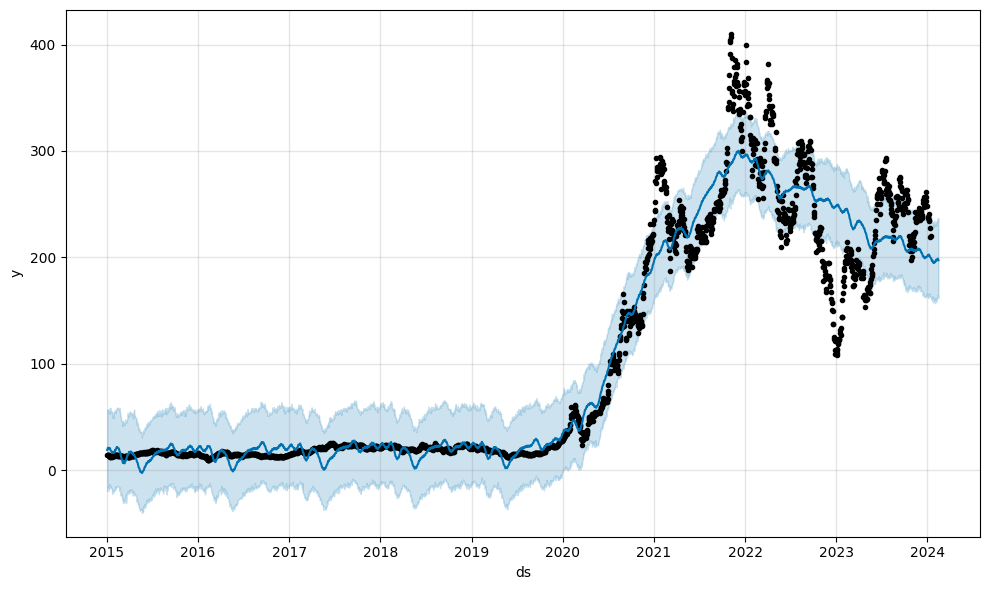

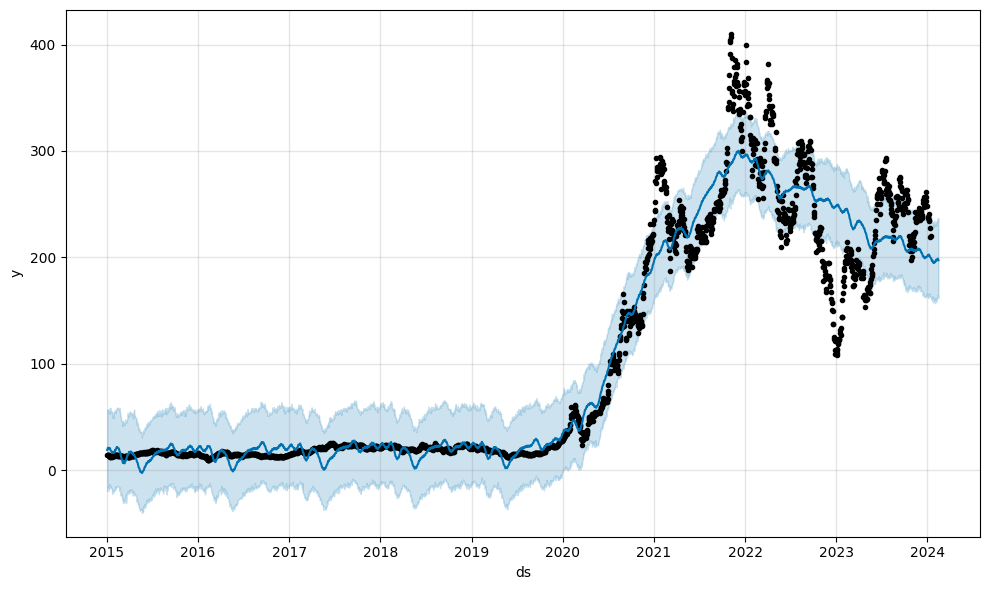

In [43]:
# Plot the forecast
model.plot(forecast)

Evaluate model

To evaluate the Prophet model using Mean Squared Error (MSE) and Mean Absolute Error (MAE).



In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])
print('Mean Squared error: ', mse)

Mean Squared error:  811.7005389284465


In [51]:
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])
print('Mean absolute error: ', mae)

Mean absolute error:  17.5410563515023


In the above code, df['y'] represents the actual values, and forecast['yhat'] represents the predicted values.